In [26]:
from fairworkflows import FairStep, FairWorkflow, add_step
import rdflib

# Load a FairStep from a nanopub description

In [2]:
step = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')

In [3]:
print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix p-plan: <http://purl.org/net/p-plan#> .

_:Nff454e46091543d49af0e76abc759ee9 {
    [] a bpmn:ManualTask,
            p-plan:Step ;
        dcterms:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




In [4]:
step.validate()

AssertionError: Step RDF has no rdfs:label


In [6]:
step.is_pplan_step

True

In [7]:
step.description

rdflib.term.Literal('Preheat an oven to 350 degrees F (175 degrees C).')

In [8]:
step.is_manual_task

True

In [9]:
step.is_script_task

False

# Create a FairWorkflow
Then add a few steps to it.

In [10]:
# Create a workflow
workflow = FairWorkflow(description='This is a test workflow.')

In [11]:
# Load some steps from nanopublications
preheat_oven = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')
melt_butter = FairStep.from_nanopub(uri='http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step')
arrange_chicken = FairStep.from_nanopub(uri='http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step')

In [12]:
# Specify ordering of steps
workflow.add(melt_butter, follows=preheat_oven)
workflow.add(arrange_chicken, follows=melt_butter)

In [13]:
# Does it validate? No.
workflow.validate()

AssertionError: Plan RDF has no rdfs:label
Plan RDF does not specify a first step (pwo:hasFirstStep)


In [16]:
# Specify the first step in the plan
workflow.first_step = preheat_oven

In [17]:
# Print workflow rdf
print(workflow)

Workflow URI = None
@prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix ns2: <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#> .
@prefix ns3: <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#> .
@prefix ns4: <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix pwo: <http://purl.org/spar/pwo/> .

_:N5fc87c004093433ead79e5dc8a713f18 {
    ns2:step pplan:isStepOfPlan _:plan .

    ns3:step pplan:isStepOfPlan _:plan ;
        dul:precedes ns4:step .

    ns4:step pplan:isStepOfPlan _:plan ;
        dul:precedes ns2:step .

    _:plan a pplan:Plan ;
        ns1:description "This is a test workflow." ;
        pwo:hasFirstStep ns3:step .
}




In [18]:
# Validate the workflow rdf with the plex shape file
workflow.shacl_validate()

In [19]:
# Validate the step rdf with the plex shape file
workflow.shacl_validate()

In [20]:
preheat_oven.shacl_validate()

In [21]:
print(conforms)
print(results_graph)
print(results_text)

NameError: name 'conforms' is not defined

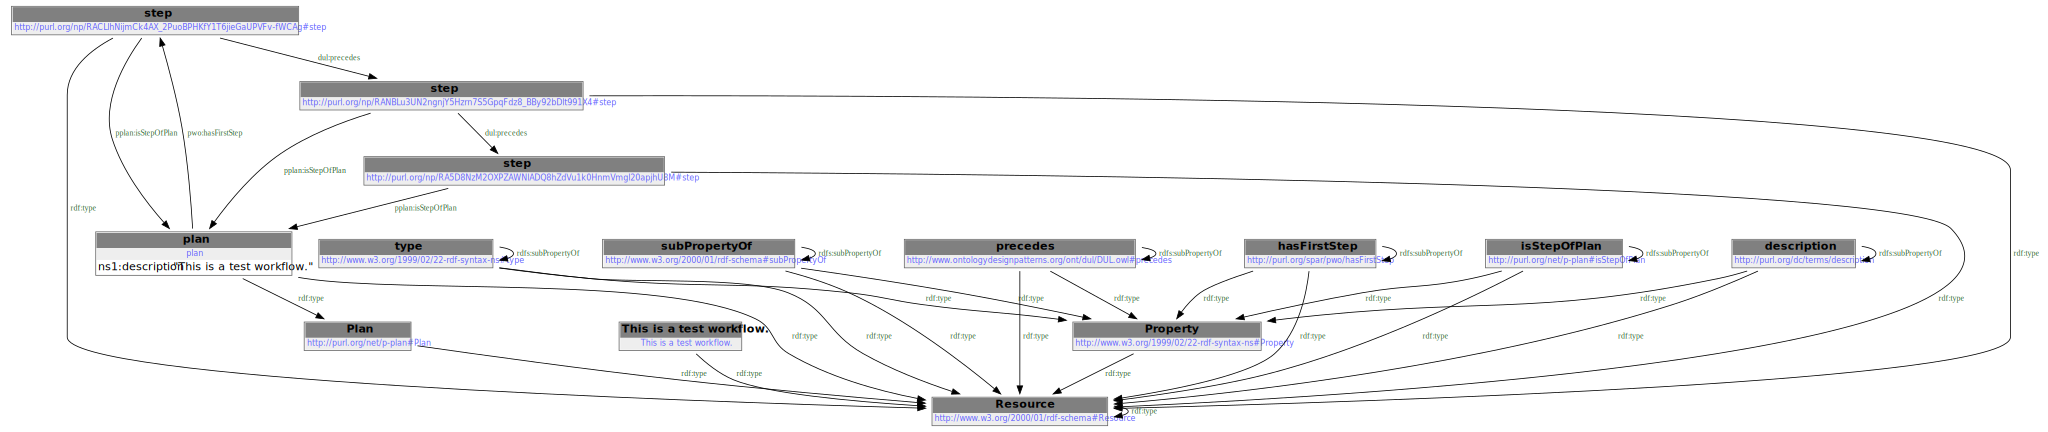

In [22]:
# What does the graph look like?
workflow.display()

# What if we want to add computational steps?
You can convert a python function to a FairStep and add it to the plex workflow.

In [23]:
# Define your computational step as a function
def a_computational_step(x, y):
    """A test function that adds two numbers"""
    return x + y

In [24]:
# Make it a FairStep and add it to the workflow
new_step = FairStep.from_function(a_computational_step)
workflow.add(new_step)

# Alternatively, use the @fairstep decorator
Use the decorator on any function that defines a computational step you wish to carry out. Each time it is called, a FairStep describing that step will be created and added to the plex workflow. This includes any input variables and their values.

In [27]:
@add_step(workflow)
def another_computational_step(a, b):
    """Another script task"""
    return a * b

In [28]:
# Run the step
another_computational_step(1, 5)

In [29]:
# Run it again with different inputs
another_computational_step(4, 3)

In [30]:
# Both computational steps have now been added to the plex workflow
print(workflow)

Workflow URI = None
@prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns1: <http://purl.org/dc/terms/> .
@prefix ns2: <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#> .
@prefix ns3: <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#> .
@prefix ns4: <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix pwo: <http://purl.org/spar/pwo/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

_:N5fc87c004093433ead79e5dc8a713f18 {
    ns1:description a rdf:Property,
            rdfs:Resource ;
        rdfs:subPropertyOf ns1:description .

    <http://purl.org/nanopub/temp/mynanopub#functiona_computational_step1607587704.1579351> pplan:isStepOfPlan _:plan ;
        dul:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1607587767.959347> .

    <http://purl.org/na

# Walking the workflow graph
We can now ask the FairWorkflow object to give us each step of the workflow we have constructed, one at a time. This is in the correct order (taking into account precedence defined earlier).

In [31]:
for step in workflow:
    print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix p-plan: <http://purl.org/net/p-plan#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

_:Ne366ef60161c4259b8b3f064138f4eee {
    bpmn:ManualTask a rdfs:Resource .

    dcterms:description a rdf:Property ;
        rdfs:subPropertyOf dcterms:description .

    p-plan:Step a rdfs:Resource .

    rdf:type a rdf:Property ;
        rdfs:subPropertyOf rdf:type .

    rdfs:subPropertyOf a rdf:Property ;
        rdfs:subPropertyOf rdfs:subPropertyOf .

    "Preheat an oven to 350 degrees F (175 degrees C)." a rdfs:Resource .

    [] a bpmn:ManualTask,
            p-plan:Step,
            rdfs:Resource ;
        dcterms:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}


Step URI = http://purl.org/np/RANBLu3UN2ngn

# Initialize a Fairworkflow object directly from RDF

### An example RDF graph in the PLEX format.
Note that 2 steps are fully described in the RDF, but the last step refers to a nanopub publication

In [32]:
plex_rdf_trig = '''
@prefix this: <http://www.example.org/workflow1> .
@prefix sub: <http://www.example.org/workflow1#> .
@prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix terms: <http://purl.org/dc/terms/> .
@prefix pwo: <http://purl.org/spar/pwo/> .
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .

{
    sub:step1 dul:precedes sub:step2 .
    sub:step2 dul:precedes <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .
    
    this: a pplan:Plan ;
       terms:description "This is a test workflow." ;
       pwo:hasFirstStep sub:step1 .

    sub:step1 pplan:isStepOfPlan this:;
        a pplan:Step;
        terms:description "Step 1";
        a bpmn:ManualTask .

    sub:step2 pplan:isStepOfPlan this:;
        a pplan:Step;
        terms:description "Step 2";
        a bpmn:ManualTask .

    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> pplan:isStepOfPlan this: .
}
'''

In [33]:
g = rdflib.Graph()
g.parse(data=plex_rdf_trig, format='trig')

<Graph identifier=N585e86077f194dc1815e152d0e01e7b2 (<class 'rdflib.graph.Graph'>)>

In [35]:
workflow = FairWorkflow.from_rdf(rdf=g, uri='http://www.example.org/workflow1', fetch_references=False)

/Users/svenvanderburg/projects/fair-workflows/fairworkflows/fairworkflows/fairworkflow.py:87: UserWarning: Could not get detailed information for step http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step, adding a FairStep without attributes. This will limit functionality of the FairWorkflow object.
  warnings.warn(f'Could not get detailed information for '


In [36]:
workflow = FairWorkflow.from_rdf(rdf=g, uri='http://www.example.org/workflow1', fetch_references=True)

In [37]:
workflow.validate()

AssertionError: Plan RDF has no rdfs:label


In [38]:
for step in workflow:
    print(step)

Step URI = http://www.example.org/workflow1#step1
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nce38784a79ab48d6a4af1b93dab87bfc {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Step 1" .
}


Step URI = http://www.example.org/workflow1#step2
@prefix ns1: <http://purl.org/dc/terms/> .

_:N2c2c9b64de0b471a823d229d40255bf9 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Step 2" .
}


Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix p-plan: <http://purl.org/net/p-plan#> .

_:N86746b84c7424b5eb5cfc3af086f4f54 {
    [] a bpmn:ManualTask,
            p-plan:Step ;
        dcterms:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




# Fairstep inputs and outputs

Let's construct a new test workflow

In [39]:
test_description = 'This is a test workflow.'
workflow = FairWorkflow(description=test_description)

step1 = FairStep(uri='http://www.example.org/step1')
step2 = FairStep(uri='http://www.example.org/step2')

workflow.first_step = step1
workflow.add(step2, follows=step1)

Now let's add some inputs and outputs and validate those

In [40]:
step1.inputs = ['var4']
step1.outputs = ['var2']
step2.inputs = ['var2', 'var3']
step2.outputs = ['var4']

Let's validate, remember that the step precedence is step1 -> step2

In [41]:
workflow.validate()

AssertionError: Plan RDF has no rdfs:label
step has input var4 that is the output of a later step


We made a mistake there, let's fix it!

In [42]:
step1.inputs = ['var1']
step1.outputs = ['var2']
step2.inputs = ['var2', 'var3']
step2.outputs = ['var4']

In [43]:
workflow.validate()

AssertionError: Plan RDF has no rdfs:label


We can check the unbound inputs
(Unbound inputs are inputs that are not outputs of any preceding step.
You could consider them inputs for the workflow.)

In [44]:
for input, step in workflow.unbound_inputs:
    print(f'{step.uri} has an unbound input {input}')

http://www.example.org/step1 has an unbound input var1
http://www.example.org/step2 has an unbound input var3


And unbound outputs

In [45]:
for output, step in workflow.unbound_outputs:
    print(f'{step.uri} has an unbound output {output}')

http://www.example.org/step2 has an unbound output var4
